In [5]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from src.process import BatchProcess, FedBatchProcess
from src.pinn import PINN, numpy_to_tensor, train
from src.utils import get_data, get_data_and_feed

pd.options.mode.chained_assignment = None

np.set_printoptions(precision=4)

%load_ext autoreload
%autoreload 2

# # Define kinetic parameters
# spyros_mu_max = 0.870
# spyros_K_s = 0.214
# spyros_Y_xs = 0.496

FILENAME = '../data/data_processed.xlsx'
EXPERIMENT = 'BR04'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
df, feeds = get_data_and_feed(file_name=FILENAME, experiment=EXPERIMENT)

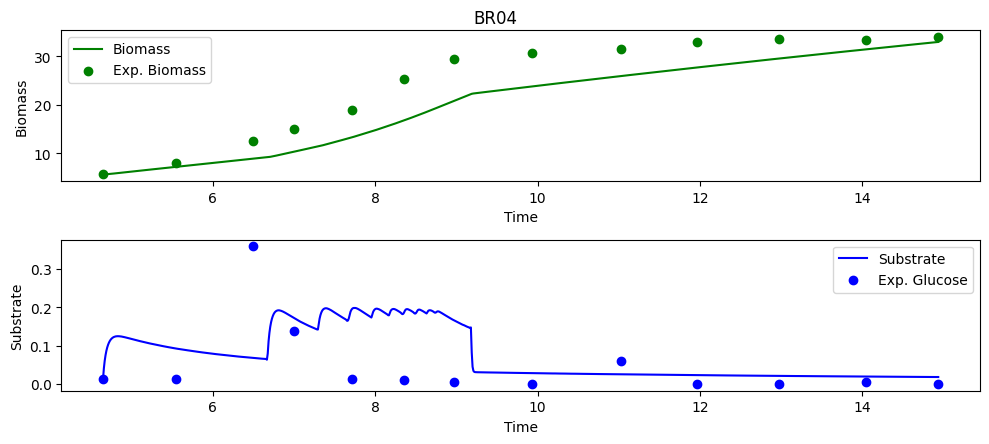

In [7]:
fed_batch = FedBatchProcess(df, feeds, mu_max=0.870, Ks=0.214, Yxs=0.496)

fed_batch.simulate(eval=False)

fed_batch.plot_simulation('BR04')